<a href="https://colab.research.google.com/github/RoseMwangi98/E_COMMERCE-ANALYSIS/blob/main/IP_WK_12_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Defining the Question 

To identify the individuals that are more likely to click on the ads.

### The Metric for Success

To provide an accurate picture of the people most likely to view the clients advertisements and provide recommendations to the client based on the results of this analysis.

### The Context
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads

### The Experimental Design Taken

For this analysis I first loaded the dataset provided , previewed the dataset and carried out data cleaning. Next I checked for anomalies and outliers in the dataset and dealt with these. 
Finally I carried out Univariate and Bivariate analysis and provided insights and recommendations to the client based on my findings.

### Appropriateness of the data 

Given the task at hand the data provided is appropriate to carry out this analysis.


# 1. Loading the Appropriate Libraries and Importing the Dataset

In [ ]:
#import the library that are needed
install.packages('tidyverse')
install.packages("funModeling")
install.packages("Hmisc")
# Installing packages we need for the project analysis.

install.packages("iterators")  
install.packages("caret") 
install.packages("caretEnsemble")
install.packages("ggplot2")
install.packages("e1071")
install.packages("randomForest")
install.packages("ggcorrplot")
install.packages('ranger')
install.packages('caTools')
install.packages('rpart.plot')

# Importing Libraries we need for this Project analysis.

library(tidyverse)
library(data.table)
library(ggplot2)
library(lattice)
library(caret)
library(rpart)
library(RColorBrewer)
library("rpart.plot")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packag

In [ ]:
#load the dataset and preveiw the first six rows
data = read.csv('advertising.csv')
head(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
#preveiw the bottom rows
tail(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
glimpse(data)

Rows: 1,000
Columns: 10
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88.…
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 3…
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73889…
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 226.7…
$ Ad.Topic.Line            <chr> "Cloned 5thgeneration orchestration", "Monito…
$ City                     <chr> "Wrightburgh", "West Jodi", "Davidton", "West…
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, …
$ Country                  <chr> "Tunisia", "Nauru", "San Marino", "Italy", "I…
$ Timestamp                <chr> "2016-03-27 00:53:11", "2016-04-04 01:39:02",…
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, …


In [ ]:
#names of the columns
names(data)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [ ]:
#various datatypes in our dataset
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [ ]:
#summary statistics
summary(data)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

# 2. Data Cleaning

In [ ]:
# find missing values and duplicates in our dataset
rowSums(is.na(data))


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

In [ ]:
#missing data in columns
colSums(is.na(data))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [ ]:
#check for duplicates
sum(duplicated(data))

[1] 0

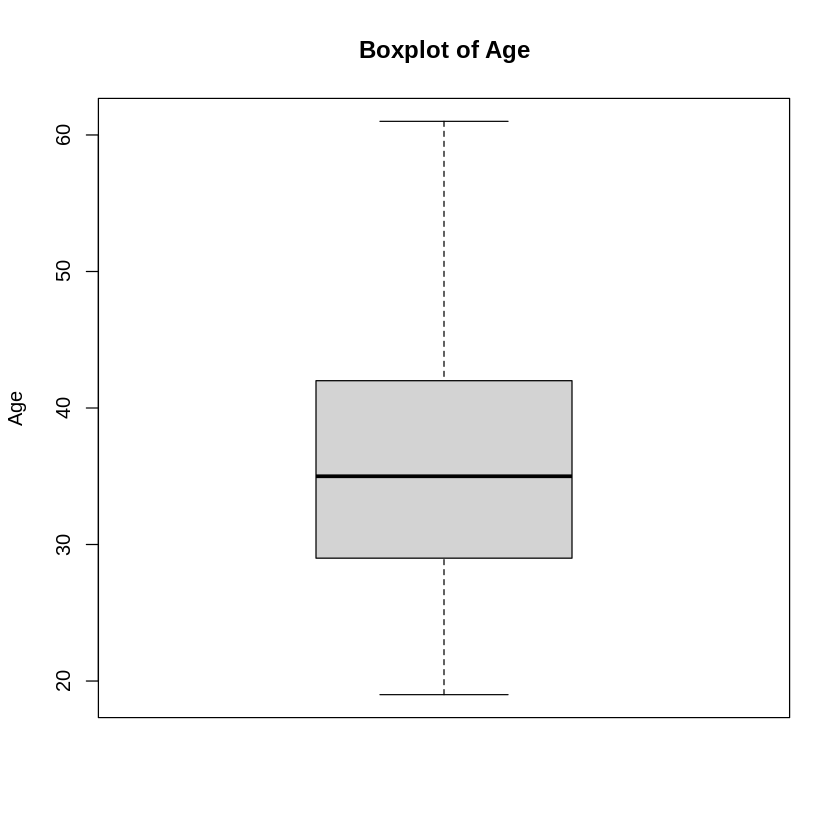

In [ ]:

boxplot(data$Age,
  ylab = "Age",
  main = "Boxplot of Age"
)


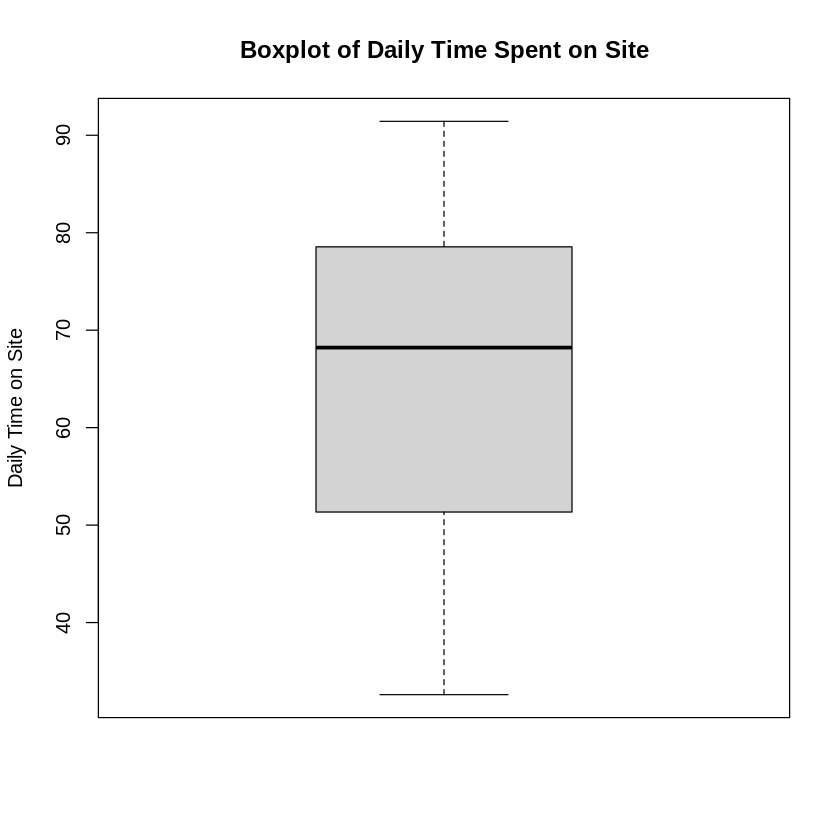

In [ ]:
boxplot(data$Daily.Time.Spent.on.Site,
  ylab = "Daily Time on Site",
  main = "Boxplot of Daily Time Spent on Site"
)

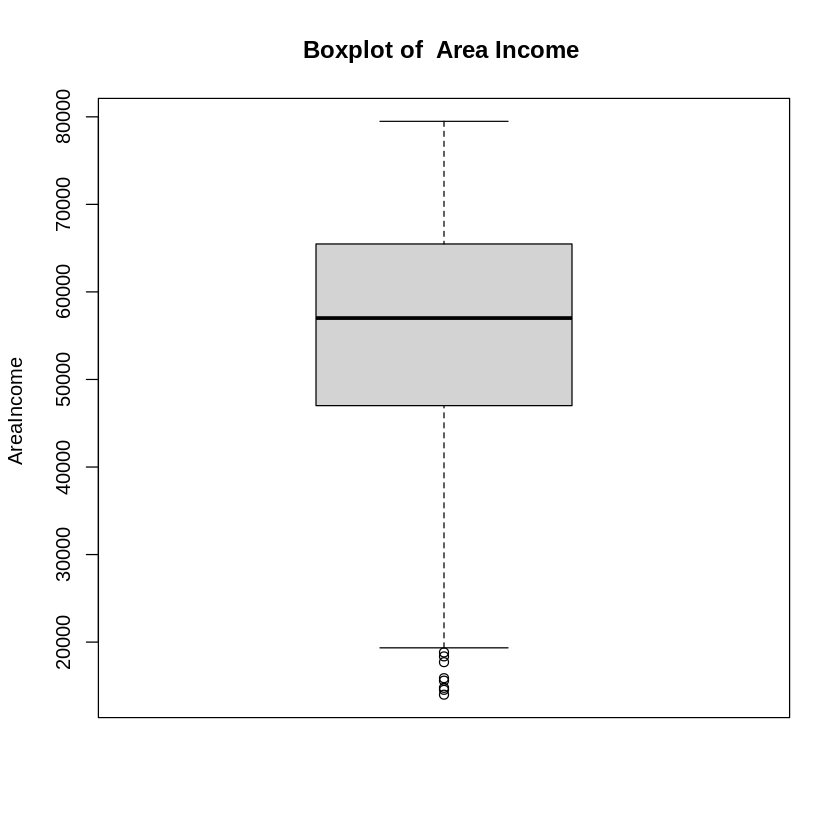

In [ ]:
boxplot(data$Area.Income ,
  ylab = "AreaIncome ",
  main = "Boxplot of  Area Income "
)

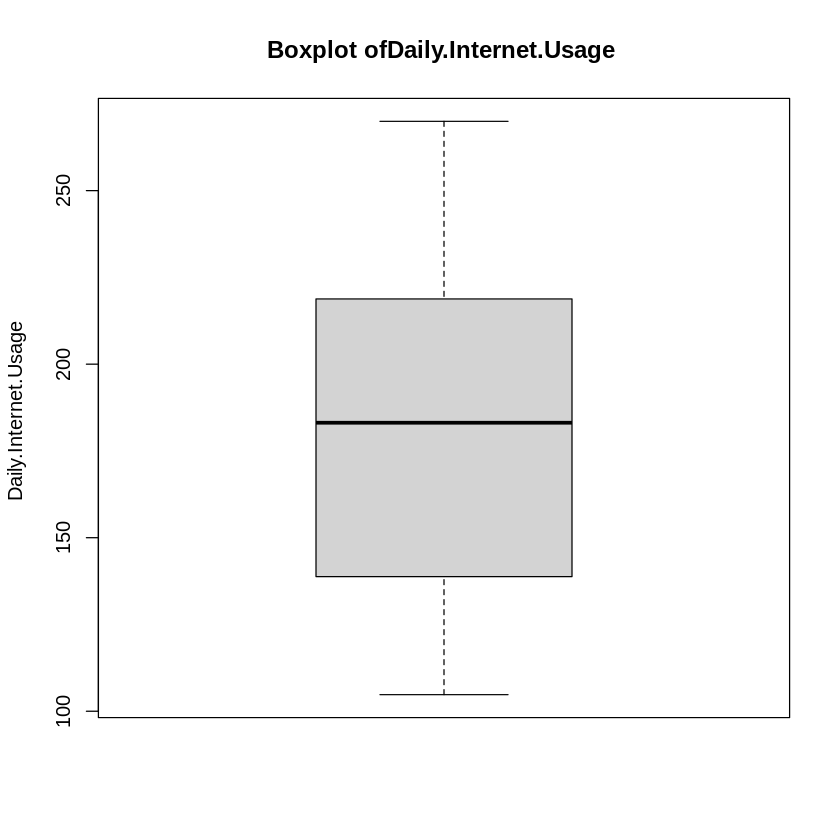

In [ ]:
boxplot(data $ Daily.Internet.Usage  ,
  ylab = " Daily.Internet.Usage  ",
  main = " Boxplot ofDaily.Internet.Usage  "
)

# 3. Exploratory Data Analysis

### 3.1. Univariate Data Analysis

In [ ]:
describe(data)

data 

 10  Variables      1000  Observations
--------------------------------------------------------------------------------
Daily.Time.Spent.on.Site 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0      900        1       65    18.11    37.58    41.34 
     .25      .50      .75      .90      .95 
   51.36    68.22    78.55    83.89    86.20 

lowest : 32.60 32.84 32.91 32.99 33.21, highest: 90.97 91.10 91.15 91.37 91.43
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       43    0.999    36.01    9.943    23.95    26.00 
     .25      .50      .75      .90      .95 
   29.00    35.00    42.00    49.00    52.00 

lowest : 19 20 21 22 23, highest: 57 58 59 60 61
--------------------------------------------------------------------------------
Area.Income 
       n  missing distinct     Info     Mean      Gmd      .0

In [ ]:
Time <- (data$Daily.Internet.Usage)
 head(Time)

[1] 256.09 193.77 236.50 245.89 225.58 226.74

In [ ]:
install.packages('moments')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
summary(Time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

In [ ]:
#The Standard Deviation and Variance
var(Time)
sd(Time)
#The range of the Variable
range(Time)
#The interquartile range
IQR(Time)
#The Skew and Kurtosis of the column
library(moments)

skewness(Time)
#The Kurtosis
kurtosis(Time)


[1] 1927.415

[1] 43.90234

[1] 104.78 269.96

[1] 79.9625

[1] -0.03348703

[1] 1.727701

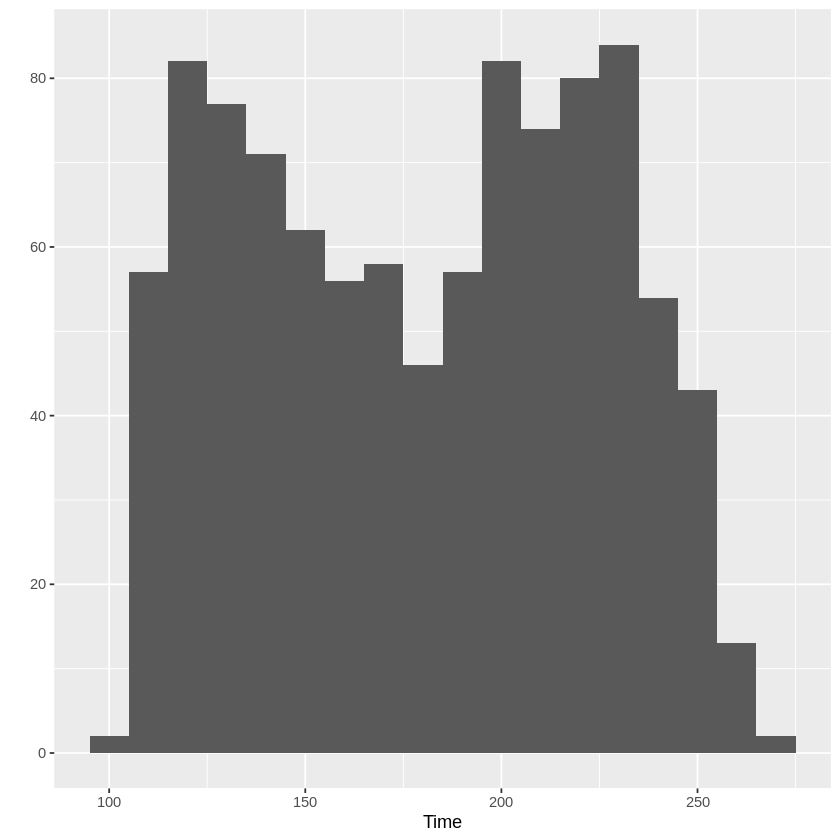

In [ ]:
qplot(Time, geom = 'histogram', binwidth = 10) + xlab('Time')

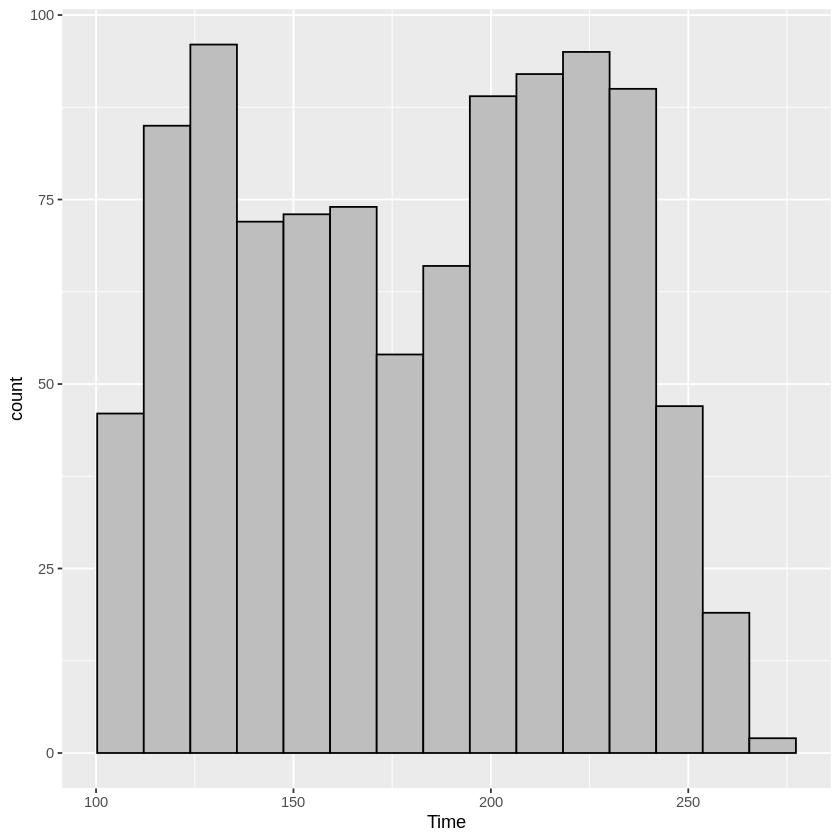

In [ ]:
ggplot(data, aes(x=Time)) + 
 geom_histogram(colour="black", fill="grey",bins=15)

In [ ]:
max(Time)

[1] 269.96

In [ ]:
describe(Time)

Time 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0      966        1      180    50.63    113.5    120.5 
     .25      .50      .75      .90      .95 
   138.8    183.1    218.8    236.2    246.7 

lowest : 104.78 105.00 105.04 105.15 105.22, highest: 259.76 261.02 261.52 267.01 269.96

The mean amount of time that users spent on the site was 180 minutes while the maximum amount of time a user spent on the site was 270.43 minutes.
  * The Variance of the column was 1927.41 with a standard deviation of 15.85361.
  * The data was negatively but fairly symmetrical with a value of -0.03712026 and the
  distribution can be categorized as platykurtic with a kurtosis value of 1.903942
  * Furthermore plotting a boxplot of the variable I observed that it didnot have any outliers .
  * Plotting a histogram for the column we can see that approxiamtely 125 users spent over 80 minutes daily on the site , and many users spent over 60 minutes on the site daily.

In [ ]:
#univariate on age
Age <-(data$Age)
head(Age)

[1] 35 31 26 29 35 23

In [ ]:
summary(Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   29.00   35.00   36.01   42.00   61.00 

In [ ]:
getmode <- function(v) #getmode is the function name
  {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
# Calculate the mode using the user function.
mode <- getmode(Age)
print(mode)

[1] 31


In [ ]:
describe(Age)

Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       43    0.999    36.01    9.943    23.95    26.00 
     .25      .50      .75      .90      .95 
   29.00    35.00    42.00    49.00    52.00 

lowest : 19 20 21 22 23, highest: 57 58 59 60 61

In [ ]:
#The Standard Deviation and Variance
var(Age)
sd(Age)
#The range of the Variable
range(Age)
#The interquartile range
IQR(Age)
#The Skew and Kurtosis of the column
library(moments)

skewness(Age)
#The Kurtosis
kurtosis(Age)

[1] 77.18611

[1] 8.785562

[1] 19 61

[1] 13

[1] 0.4784227

[1] 2.595482

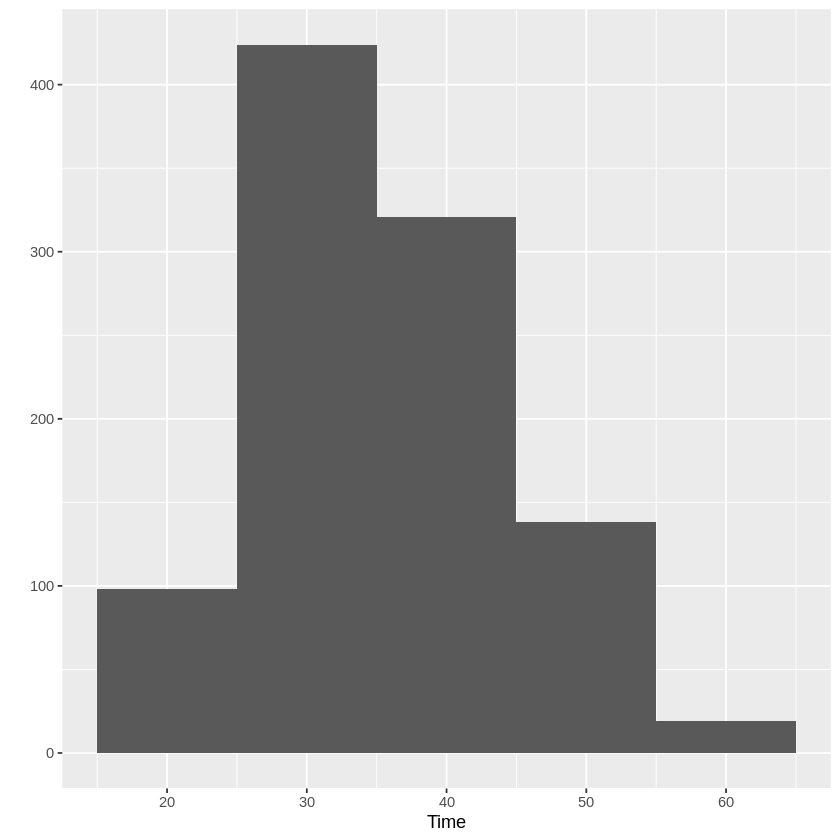

In [ ]:
qplot(Age, geom = 'histogram', binwidth = 10) + xlab('Time')

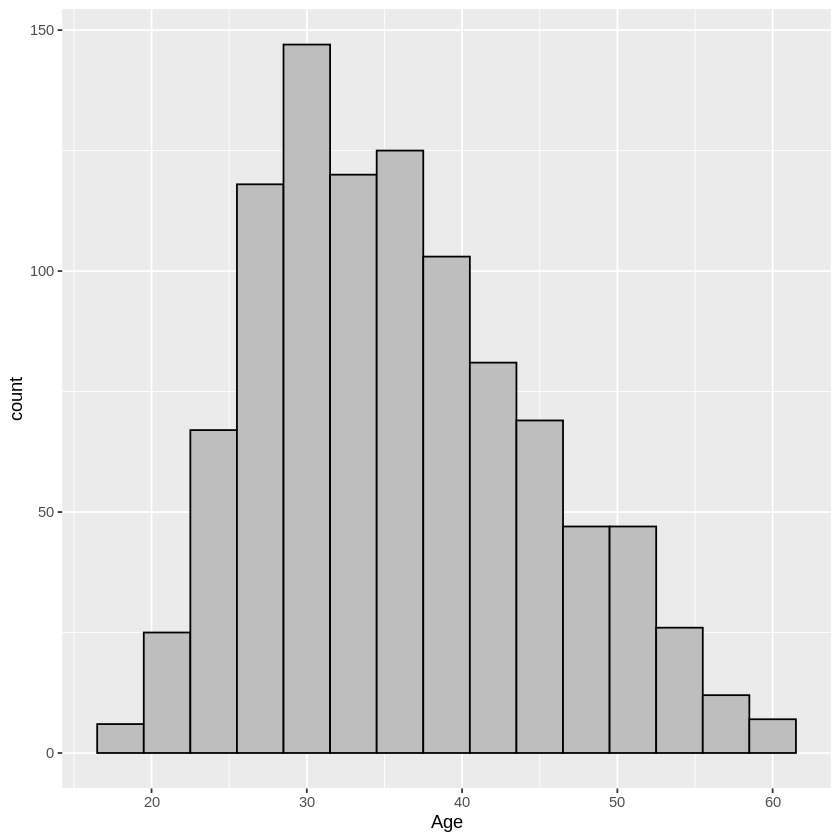

In [ ]:
ggplot(data, aes(x=Age)) + 
 geom_histogram(colour="black", fill="grey",bins=15)

From the Age column I observed that :

* The mean age of the consumers was 36.01 while the median age was 35 and the modal age was 31.
* The variable was positively skewed and fairly symmetrical with a skew value of  0.4777052 , the distribution was platykurtic with a kurtosis value of  2.595482
* The age of the consumers ranged between 19 and 61 , with majority of the users ranging between 30 and 45. The interquartile age for the upper and lower quartile was 13.
* The were no outliers in this column as observed from the boxplot. 

In [ ]:
#univariate analysis on income
income <- (data$Area.Income)
head(income)

[1] 61833.90 68441.85 59785.94 54806.18 73889.99 59761.56

In [ ]:
summary(income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   47032   57012   55000   65471   79485 

In [ ]:
describe(income)

income 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0     1000        1    55000    15037    28275    35223 
     .25      .50      .75      .90      .95 
   47032    57012    65471    70506    73601 

lowest : 13996.50 14548.06 14775.50 15598.29 15879.10
highest: 78092.95 78119.50 78520.99 79332.33 79484.80

[1] 61833.9


[1] 179952406

[1] 13414.63

[1] 13996.5 79484.8

[1] 18438.83

[1] -0.6493967

[1] 2.894694

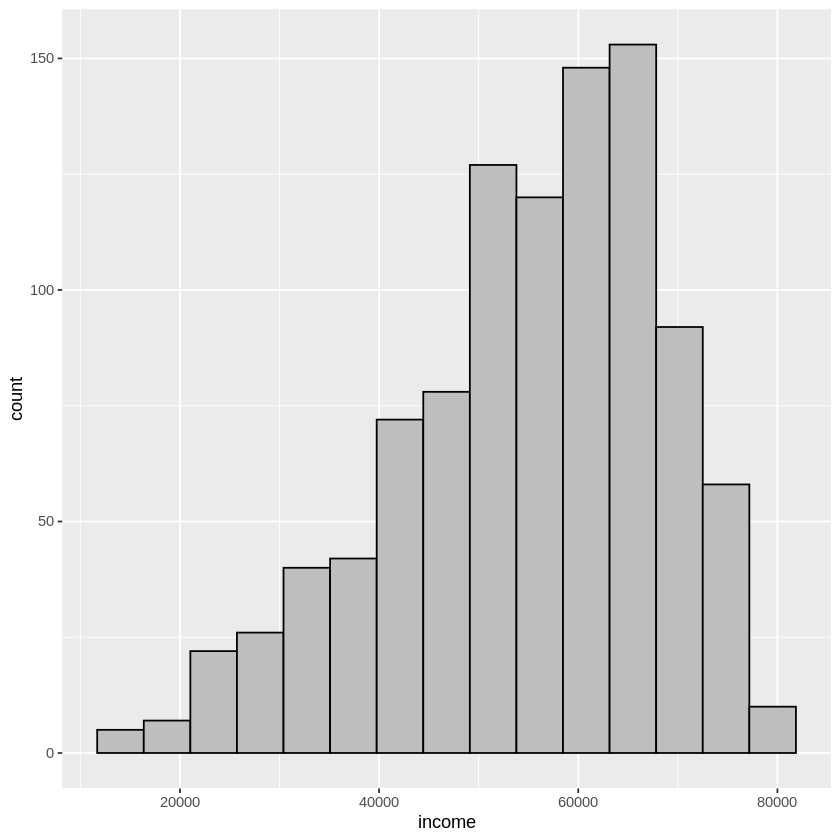

In [ ]:
getmode <- function(v) #getmode is the function name
  {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
## Calculate the mode using the user function.
mode <- getmode(income)
print(mode)
# The Standard Deviation and Variance
var(income)
sd(income)
#The range of the Variable
range(income)
#The Interquartile range
IQR(income)
#The Skew and Kurtosis of the column
skewness(income)
#The Kurtosis 
kurtosis(income)
# Histogram with density plot
ggplot(data, aes(x=income)) + 
 geom_histogram(colour="black", fill="grey",bins=15)#+
 #geom_density(alpha=.2, fill="#FF6666") 


From the Income column we can deduce that :

* The median income of the users was 57,012 while the mean income was 55,000 and the modal income was 61,833.9.
* The income of the site users ranged from 13,996 to 79,485 , with the interquarile range being 18483.83.
* The data had a negative skew and was moderately skewed with a value of -0.6484229,
the data had a platykurtic distribution with a value of 2.894694.


In [ ]:
usage <- (data$Daily.Internet.Usage)

In [ ]:
summary(usage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

In [ ]:
describe(usage)

usage 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0      966        1      180    50.63    113.5    120.5 
     .25      .50      .75      .90      .95 
   138.8    183.1    218.8    236.2    246.7 

lowest : 104.78 105.00 105.04 105.15 105.22, highest: 259.76 261.02 261.52 267.01 269.96

In [ ]:
####  Daily Internet Usage Variable


# Calculating the mode
getmode <- function(v) #getmode is the function name
  {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
# Calculate the mode using the user function.
mode <- getmode(usage)
print(mode)
# The Standard Deviation and Variance
var(usage)
sd(usage)
#The range of the Variable
range(usage)
#The Interquartile Range
IQR(usage)
#The Skew and Kurtosis of the column
skewness(usage)
# Kurtosis
kurtosis(usage)


[1] 167.22


[1] 1927.415

[1] 43.90234

[1] 104.78 269.96

[1] 79.9625

[1] -0.03348703

[1] 1.727701

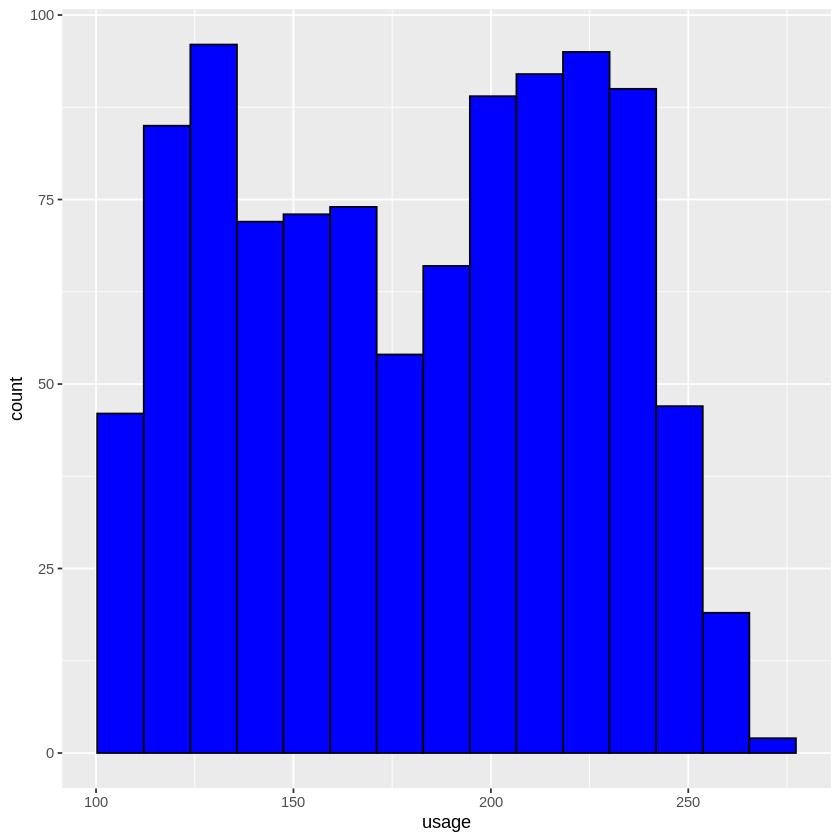

In [ ]:
# Histogram with density plot
ggplot(data, aes(x=usage)) + 
 geom_histogram(colour="black", fill="blue",bins=15)#+
 #geom_density(alpha=.2, fill="#FF6666") 


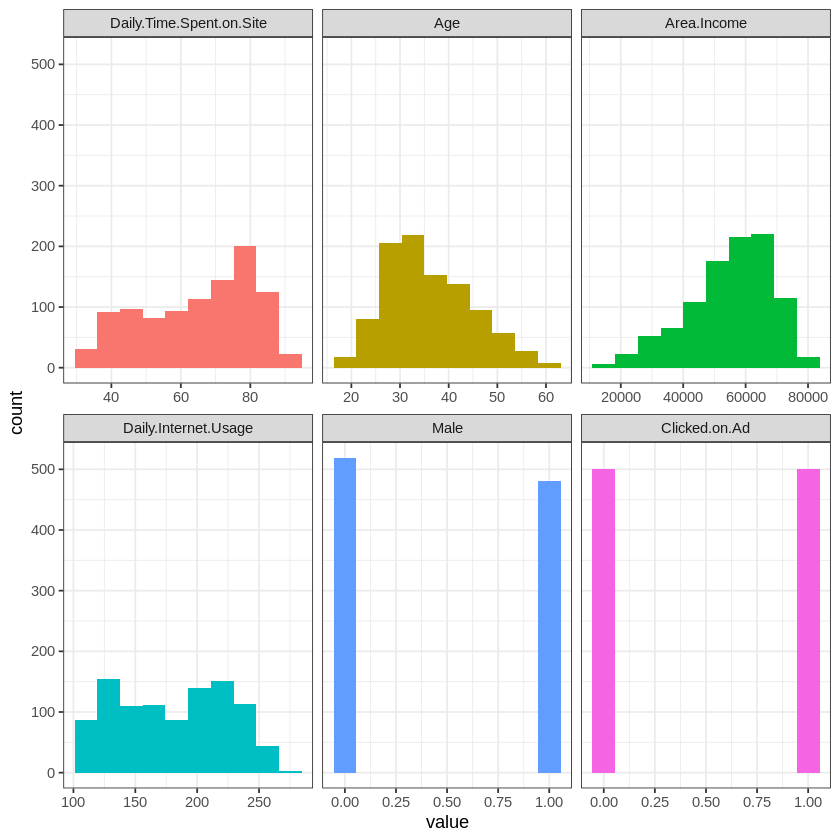

In [ ]:
plot_num(data)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


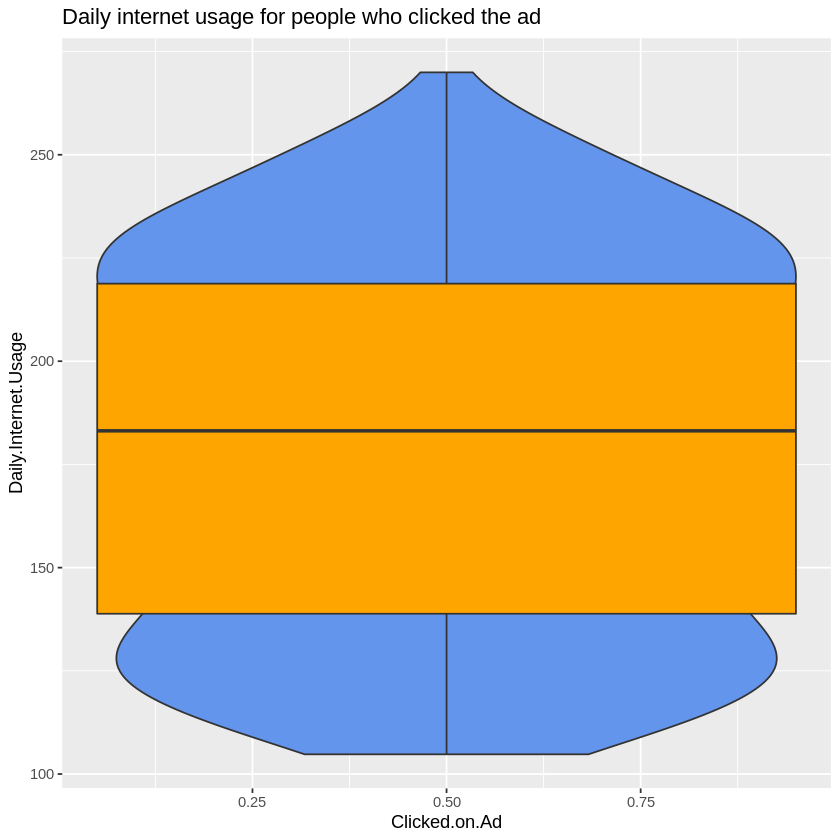

In [ ]:
# A violin plot
# Specifying the x and y variables to be plot
# Setting the color
# Plotting a boxplot inside the violin plot
# Giving a title to the chart


ggplot(data, 
       aes(x = Clicked.on.Ad, 
           y = Daily.Internet.Usage)) +
  geom_violin(fill = "cornflowerblue") +
  geom_boxplot(width = .2, 
               fill = "orange",
               outlier.color = "orange",
               outlier.size = 2) + 
  labs(title = "Daily internet usage for people who clicked the ad")

#### Plotting Countplots for the Categorical variables.

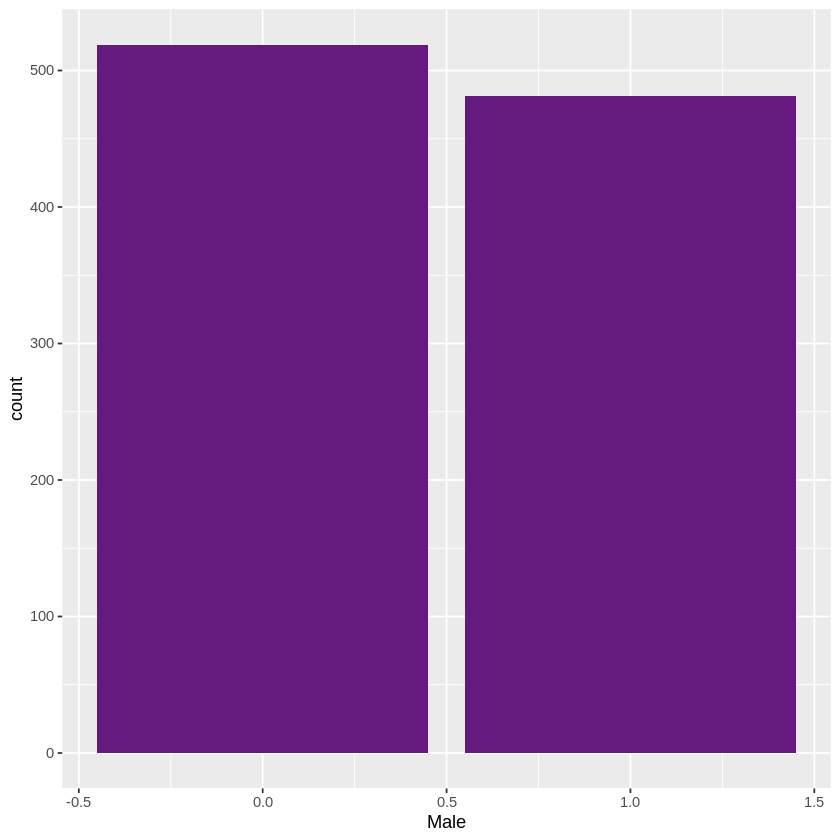

In [ ]:


##I then plotted countplots for the categorical data in the dataset and observed that:**


ggplot(data, aes(x=Male)) + geom_bar(fill=rgb(0.4,0.1,0.5))


##There were more non-male than male users who visited the site.




### 3.2. Bivariate Data Analysis

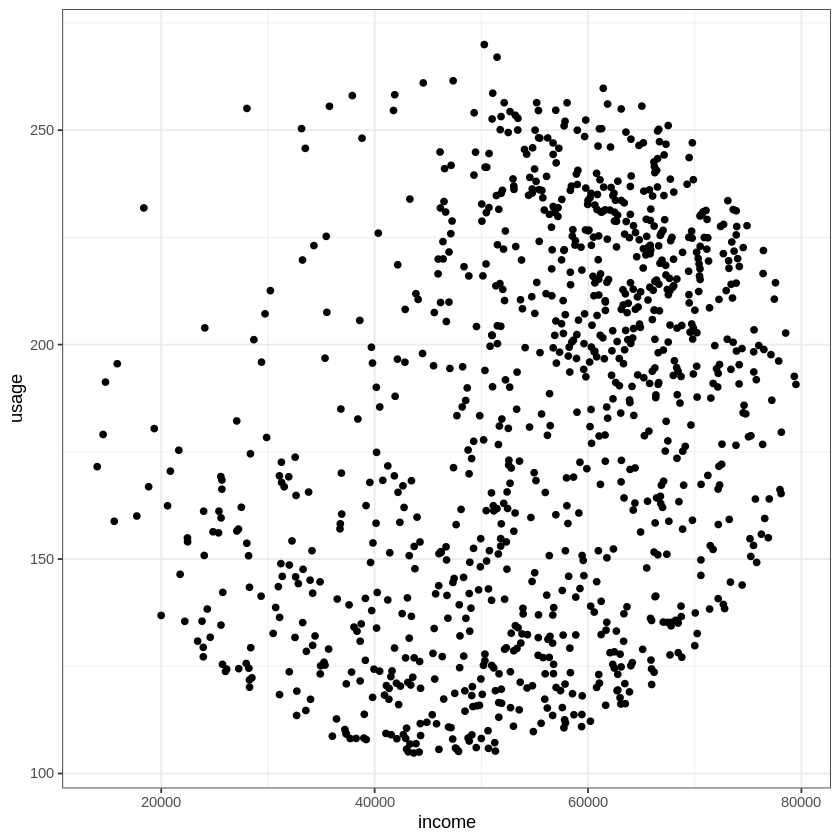

In [ ]:
library(tidyverse)

p <- ggplot(data, aes(x=income , y = usage )) 
p + geom_point()

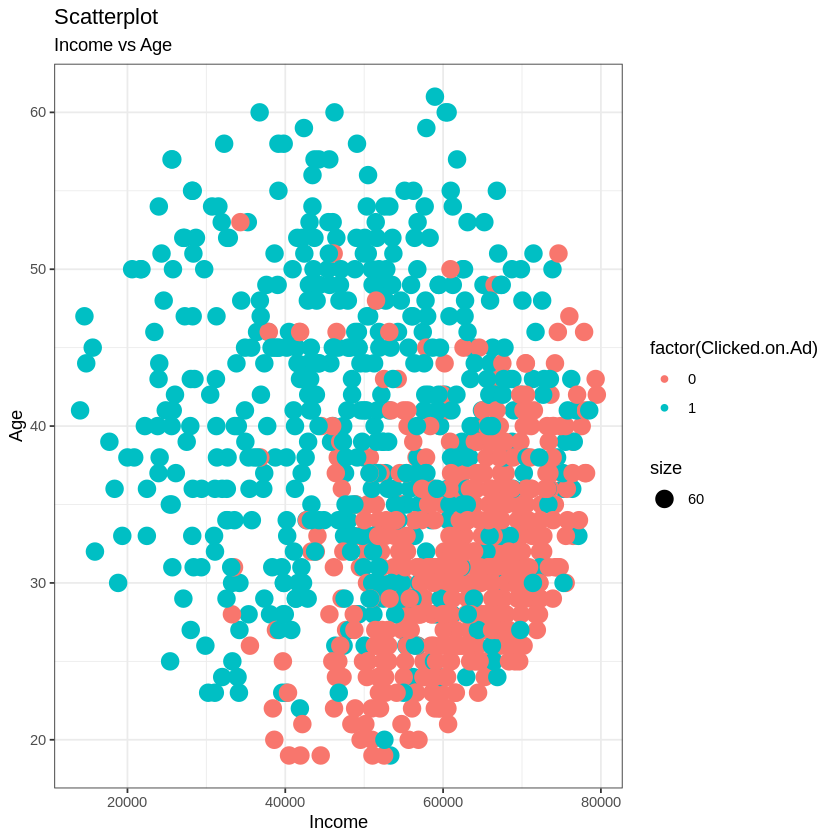

In [ ]:
library(tidyverse)

p <- ggplot(data, aes(x=income , y = Age,size=60 )) 
p + geom_point(aes(colour= factor(`Clicked.on.Ad`)))+

labs(subtitle="Income vs Age", 
       y="Age", 
       x="Income", 
       title="Scatterplot"
       )
 


The scatter plot for the Area Income against Age showed that , majority of the users who did not click on the ad were the high income earners and many of these were aged between 20 and 40 years.

The high earners are less tolerant to ads on their devices.

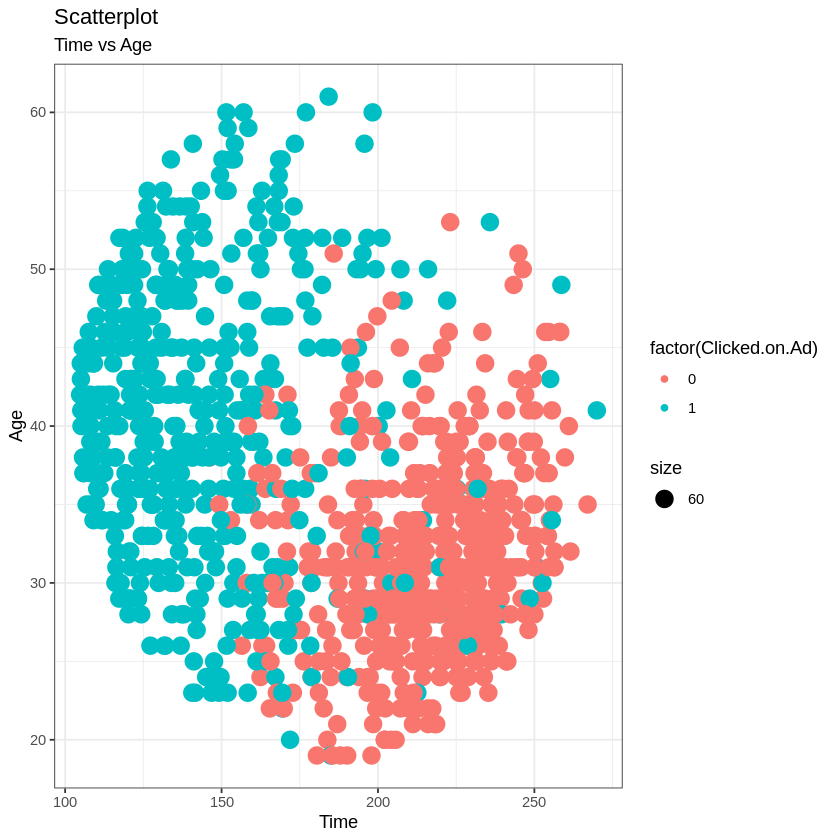

In [ ]:
library(tidyverse)

p <- ggplot(data, aes(x=Time , y = Age,size=60 )) 
p + geom_point(aes(colour= factor(`Clicked.on.Ad`)))+
labs(subtitle="Time vs Age", 
       y="Age", 
       x="Time", 
       title="Scatterplot"
       )

The older you are and the less time you spent on the internet the more likely you are to click on an advert.
The younger demographic spends more time in the internet and are reluctant to click on an ad.

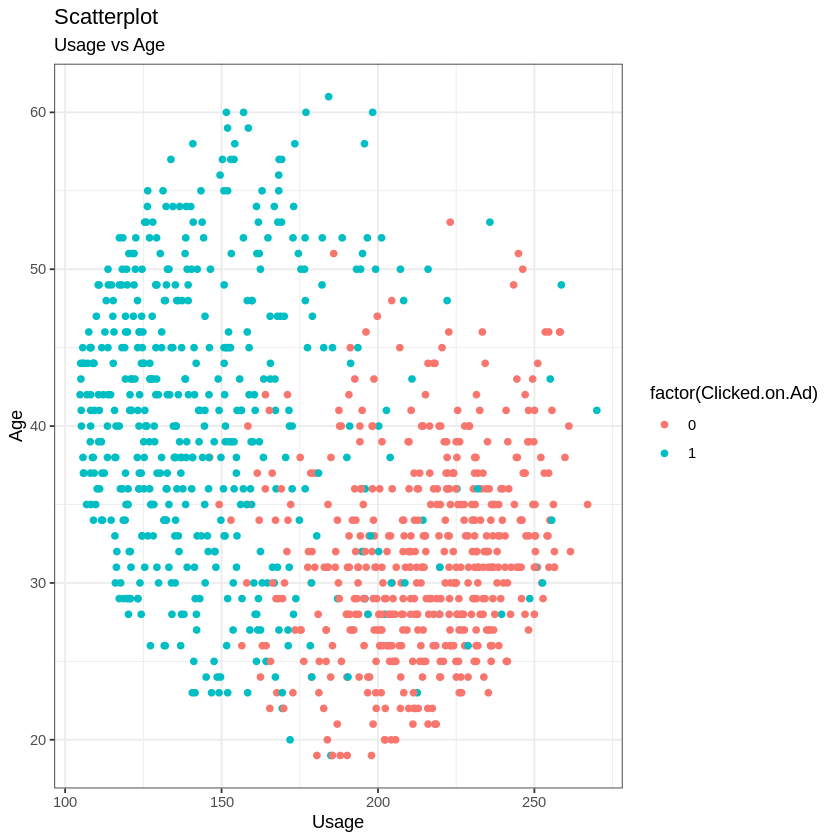

In [ ]:
library(tidyverse)

p <- ggplot(data, aes(x=usage , y = Age )) 
p + geom_point(aes(colour= factor(`Clicked.on.Ad`)))+
labs(subtitle="Usage vs Age", 
       y="Age", 
       x="Usage", 
       title="Scatterplot"
       )

The younger demographic,usage of the internet is the most and are the least likely to click on an advert,compared to the old demographic who spend less time on the internet.

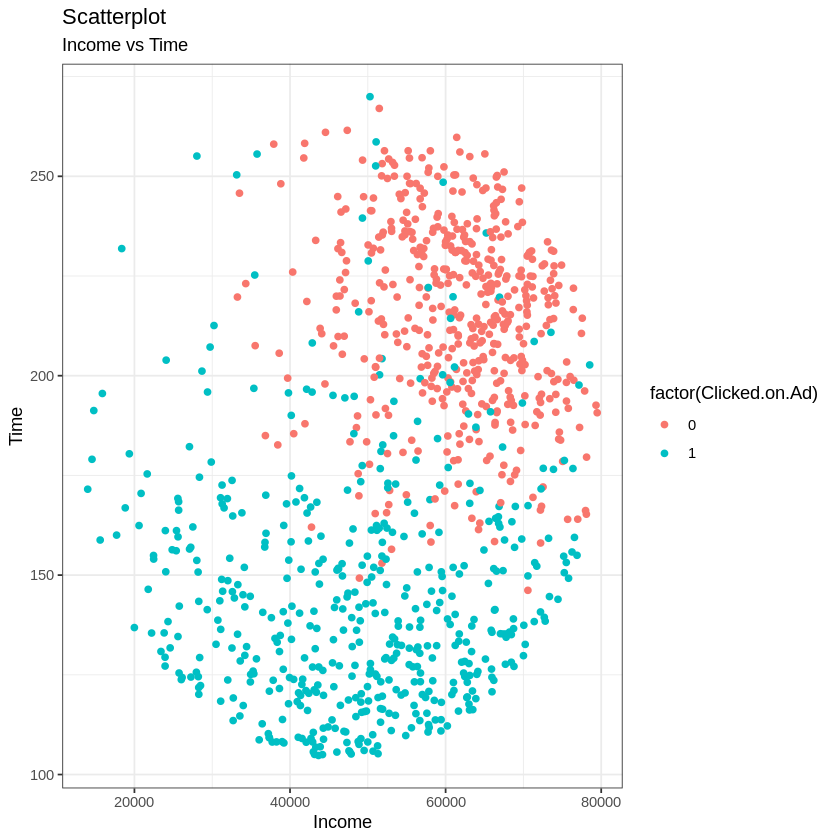

In [ ]:
ggplot(data, aes(x=income , y = Time )) + geom_point(aes(colour= factor(`Clicked.on.Ad`)))+
labs(subtitle="Income vs Time", 
       y="Time", 
       x="Income", 
       title="Scatterplot"
       )


 Once more I noted that the people who were least likely to click on the ad were the higher income earners , this was despite the fact that they seemed to spend a over an hour a day on the site

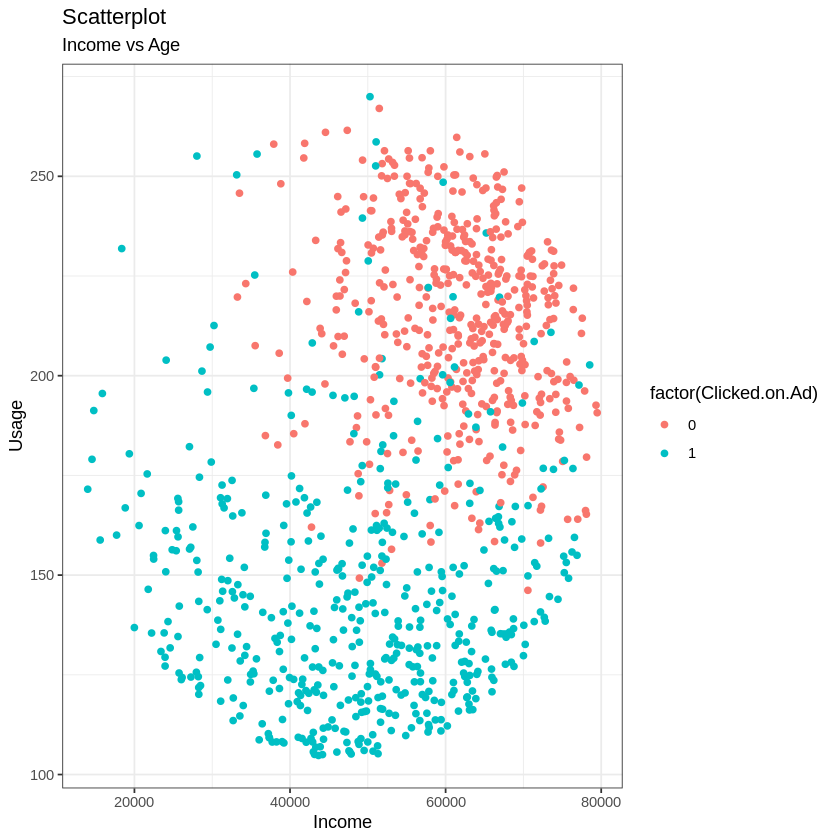

In [ ]:
library(tidyverse)

p <- ggplot(data, aes(x=income , y = usage )) 
p + geom_point(aes(colour= factor(`Clicked.on.Ad`)))+
labs(subtitle="Income vs Age", 
       y="Usage", 
       x="Income", 
       title="Scatterplot"
       )

The more an individual earns, and the more time spent on the internet,the more likely they are to click on an ad.

In [ ]:
#correlation matrix
corr <- select(data , Age , 'Area.Income', `Clicked.on.Ad`,
               `Daily.Internet.Usage`, `Daily.Time.Spent.on.Site` , Male )

In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



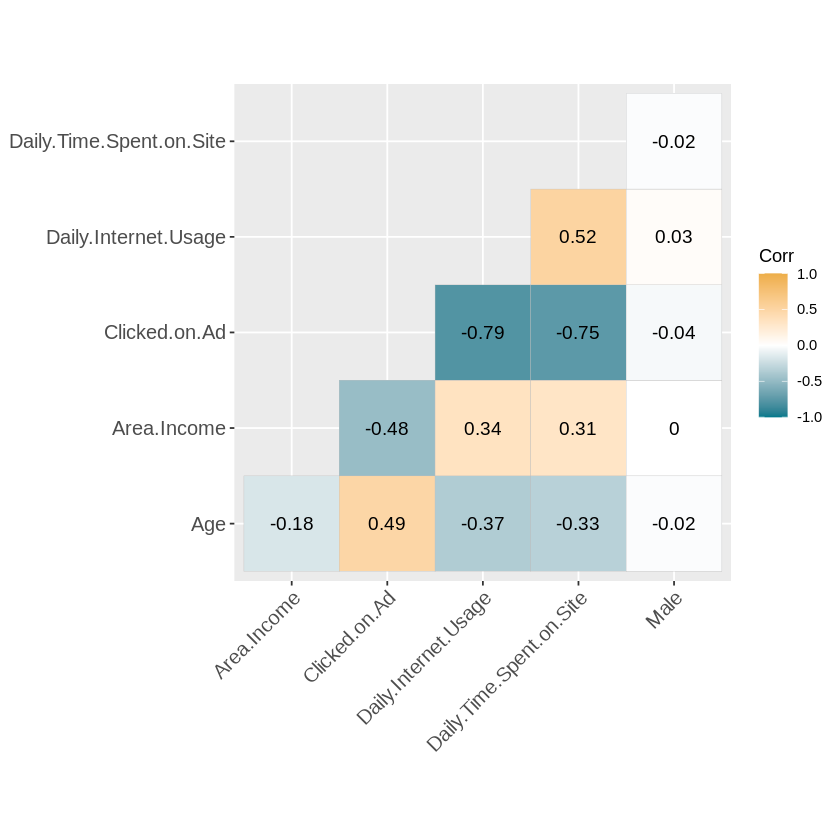

In [ ]:
# Plotting the Correlation Heatmap
library(ggcorrplot)
ggcorrplot(cor(corr), hc.order = F,type = 
"lower", lab = T ,
  ggtheme = ggplot2::theme_gray,
  colors = c("#00798c", "white", "#edae49"))


here was a strong negative correlation between the Daily Internet usage and Clicked on Ad variables.
    This means that the higher ones income the less likely they are to click on the blog ads. The same can also be said for the Daily Time Spent on Site and Click on ad variables.
    
The Click on Ad variable had a strong positive correlation with the Age Variable, the older users were more likely to click on the ad , as we observed above in our analysis.
    
 The clicked on ad variable was also strongly negatively correlated with the Area Income , where the higher ones income was the less likely they were to click on the ad.


#  4. Conclusions and Recommendations.

+ In analyzing this data I deduced that:
   * Older people , those over 35 were more likely to click on the course ad.
   * The individuals earning higher salaries were more likely not to click on the ad.
   * The probability that a consumer would click on the ad was 0.5.
   * The more time users spent on the blog , the less likely they were to click on the advertisement.
   
+ Thus given these observations I would recommend that:

1. The Blogger should target users who were aged over 35 , as they were more likely to click on the ad. 

2. Furthermore focusing more on those earning a lower income i.e less than 60,000 would prove to be more beneficial as these consumers click on ads more.

3. Finally the users who spend less time on the site and on the internet in general would prove a better demographic for the ads.



**MODELLING AND EVALUATION**

In [ ]:
#I first removed the features that I was not using to build my model.
#The City ancf Country columns which may have been useful features had too many unique variables and hence I opted to drop them as encoding them would not be a viable option.



In [ ]:
 data <- subset (data, select = -ad_topic_line)

In [ ]:
# Removing the unnecessary features from my dataset
data <- select(data , c(-City,-Country,-Timestamp, ))

In [ ]:
str(data)

'data.frame':	1000 obs. of  7 variables:
 $ daily_time_spent_on_site: num  69 80.2 69.5 74.2 68.4 ...
 $ age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ area_income             : num  61834 68442 59786 54806 73890 ...
 $ daily_internet_usage    : num  256 194 236 246 226 ...
 $ ad_topic_line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ clicked_on_ad           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


**DECISION TREE CLASSIFIER**

In [ ]:
install.packages('janitor')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#To build my model , I used the Janitor library to clean the names of the column
library(janitor)

In [ ]:
data <- clean_names(data)
names(data)

[1] "daily_time_spent_on_site" "age"                     
[3] "area_income"              "daily_internet_usage"    
[5] "male"                     "clicked_on_ad"

In [ ]:
#split the data
# Splitting the Dataset into a Train and Test set with an 80:20 split
sample_train<- sample(seq_len(nrow(data)), size = floor(0.80*nrow(data)))
sample_test <- sample(seq_len(nrow(data)), size = floor(0.20*nrow(data)))
training     <- data[sample_train, ]
test      <- data[sample_test, ]
dim(training)
dim(test)

[1] 800   6

[1] 200   6

In [ ]:
#Finally I built my decision tree using cross validation to find the optimal model.

library(caret)
training$clicked_on_ad <- as.factor(training$clicked_on_ad)
test$clicked_on_ad <- as.factor(test$clicked_on_ad)
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 5)
set.seed(123)
dtree_fit <- train(clicked_on_ad ~., data = training, method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)

In [ ]:
dtree_fit

CART 

800 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 719, 720, 720, 720, 720, 721, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9327827  0.8655621
  0.08883319  0.8927817  0.7855379
  0.17766639  0.8927817  0.7855379
  0.26649958  0.8927817  0.7855379
  0.35533278  0.8927817  0.7855379
  0.44416597  0.8927817  0.7855379
  0.53299916  0.8927817  0.7855379
  0.62183236  0.8927817  0.7855379
  0.71066555  0.8927817  0.7855379
  0.79949875  0.6591683  0.3170692

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

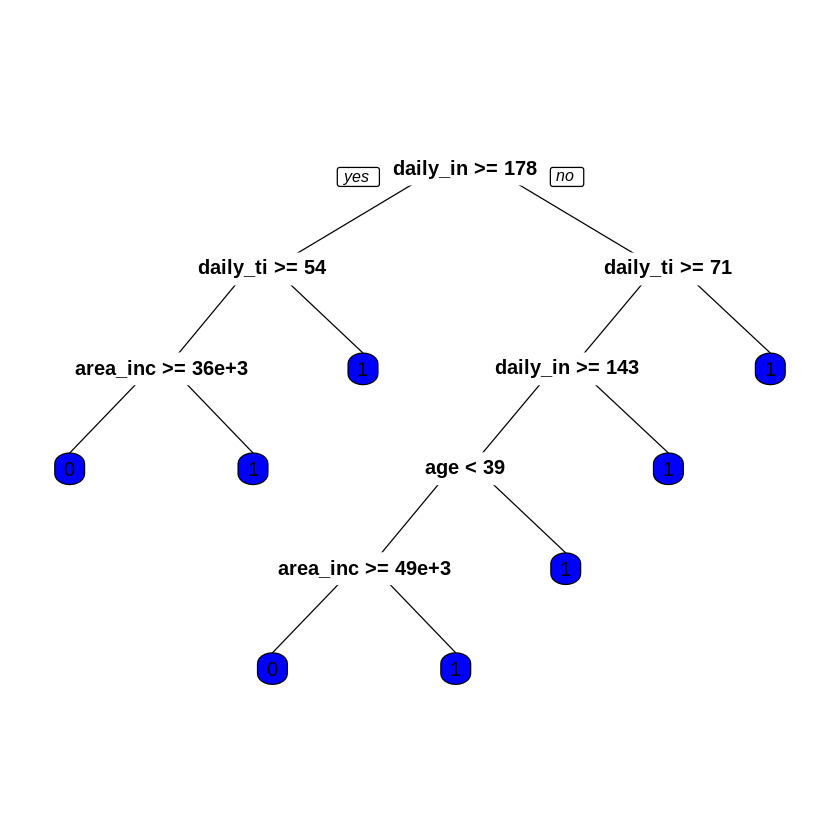

In [ ]:
library(rpart)
library(rpart.plot)
prp(dtree_fit$finalModel, box.palette = "blue")

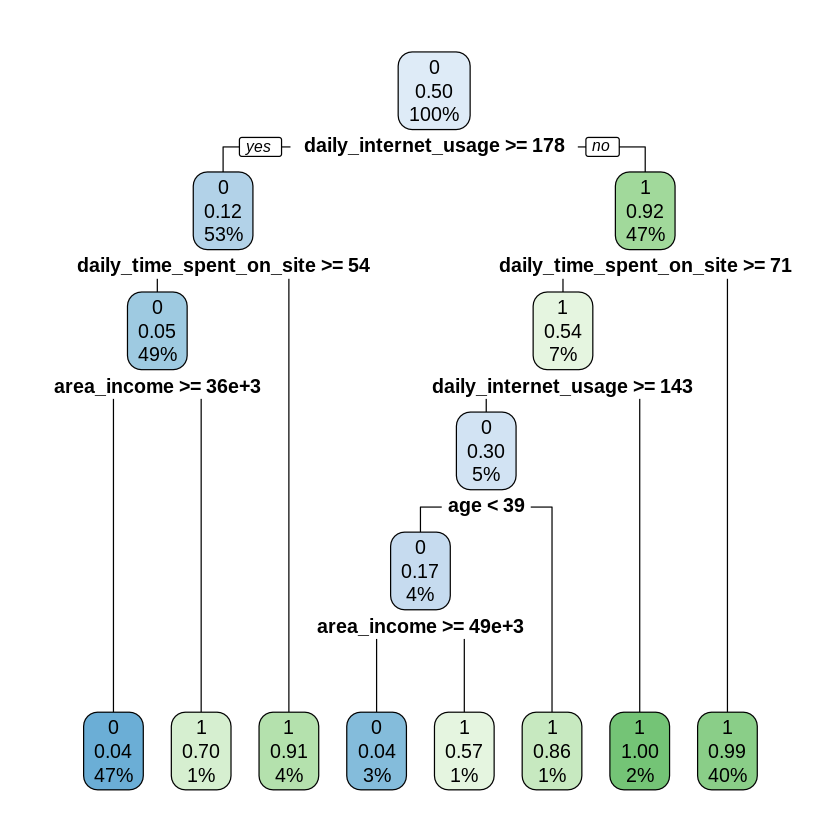

In [ ]:
rpart.plot(dtree_fit$finalModel)

In [ ]:
test_pred <- predict(dtree_fit, newdata = test)
confusionMatrix(test_pred, test$clicked_on_ad )

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 110   2
         1   4  84
                                          
               Accuracy : 0.97            
                 95% CI : (0.9358, 0.9889)
    No Information Rate : 0.57            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.939           
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.9649          
            Specificity : 0.9767          
         Pos Pred Value : 0.9821          
         Neg Pred Value : 0.9545          
             Prevalence : 0.5700          
         Detection Rate : 0.5500          
   Detection Prevalence : 0.5600          
      Balanced Accuracy : 0.9708          
                                          
       'Positive' Class : 0               
                              

From our analysis we have obtained a 97% accuracy,with  a 98% positive  value and 95% negative prediction.The model had no false negative.

**Challenging the solution using random tree**

In [ ]:
set.seed(123)
model <- train(clicked_on_ad ~. ,
                data = data,
                method = "ranger")
                
# Printing the model
model

Random Forest 

1000 samples
   5 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1000, 1000, 1000, 1000, 1000, 1000, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9601735  0.9202704
  2     extratrees  0.9610824  0.9221064
  3     gini        0.9581291  0.9161787
  3     extratrees  0.9617228  0.9233922
  5     gini        0.9517956  0.9034710
  5     extratrees  0.9611817  0.9223116

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = extratrees
 and min.node.size = 1.

The random tree has a accuracy of 96%,thus making the decision tree the better performing model.